In [16]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------
import warnings
warnings.filterwarnings("ignore")

### RESUMEN DE LAS FASES ANTERIORES

En las fases anteriores, hemos realizado una exploración y transformación de los datos, creación de nuestra base de datos y A/B Testing



- Exploración y transformación de datos: duplicados, gestión de nulos, modificación de tipos de datos...
- Creación de base de datos: Usamos el lenguaje de Python para cargar nuestros datos en MySQL.
- A/B Testing: Comprobamos si había diferencias significativas entre los diferentes grupos de satisfacción y ver si hay relación entre la satisfacción laboral y rotación de los empleados.

### VISUALIZACIONES

ANALISIS GENERAL DE LA EMPRESA

- Distribución demográfica de los empleado
- Distribución por roles y niveles de educación.

ANALISIS DEL NIVEL DE SATISFACCION

- Distribución del nivel de satisfacción de los empleados.
- Alguna comparación entre departamentos y satisfacción.

ANALISIS DE ROTACION
- Tasa de rotación de los empleados.
- Comparación de tasas de rotación por departamentos.
- Relación entre la satisfacción laboral y la rotación.

In [4]:
df = pd.read_csv("Files/df_fase1.csv", index_col=0)
df.head()

,IdEmployee,EmployeeNumber,Age,DateBirth,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,RemoteWork
0,0,"162,0",52,1972,No,no-data,684.0,6,3,no-data,1,Male,51.0,3,5,Research Director,3,no-data,6462.0,7,No,13,3,3,0,no-data,5,3,20,15,15,True
1,1,"259,0",53,1971,No,no-data,699.0,1,4,Life Sciences,1,Male,65.0,2,5,Manager,3,no-data,5678.0,0,no-data,14,3,1,1,"34,0",5,3,33,11,9,True
2,2,"319,0",43,1981,No,travel_rarely,532.0,4,2,Technical Degree,1,Male,58.0,3,5,Manager,4,Married,4933.0,1,No,11,3,4,0,"22,0",3,3,22,11,15,True
3,3,"1900,0",49,1975,No,no-data,117.0,22,3,Medical,1,Female,58.0,3,4,Manager,4,no-data,2437.0,3,No,11,3,2,1,no-data,3,3,22,4,7,True
4,4,"81,0",60,1964,No,no-data,1435.0,25,3,Life Sciences,1,Female,99.0,3,3,Sales Executive,1,no-data,2354.0,7,no-data,11,3,4,0,"28,0",3,2,21,7,9,True


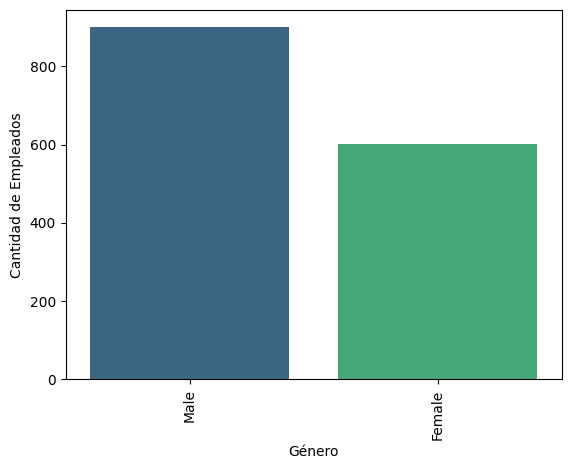

In [49]:
# Distribución por género de los empleados:

sns.countplot(x = "Gender", 
              data = df,
              palette= "viridis")

plt.xticks(rotation = 90)

plt.xlabel("Género")
plt.ylabel("Cantidad de Empleados");

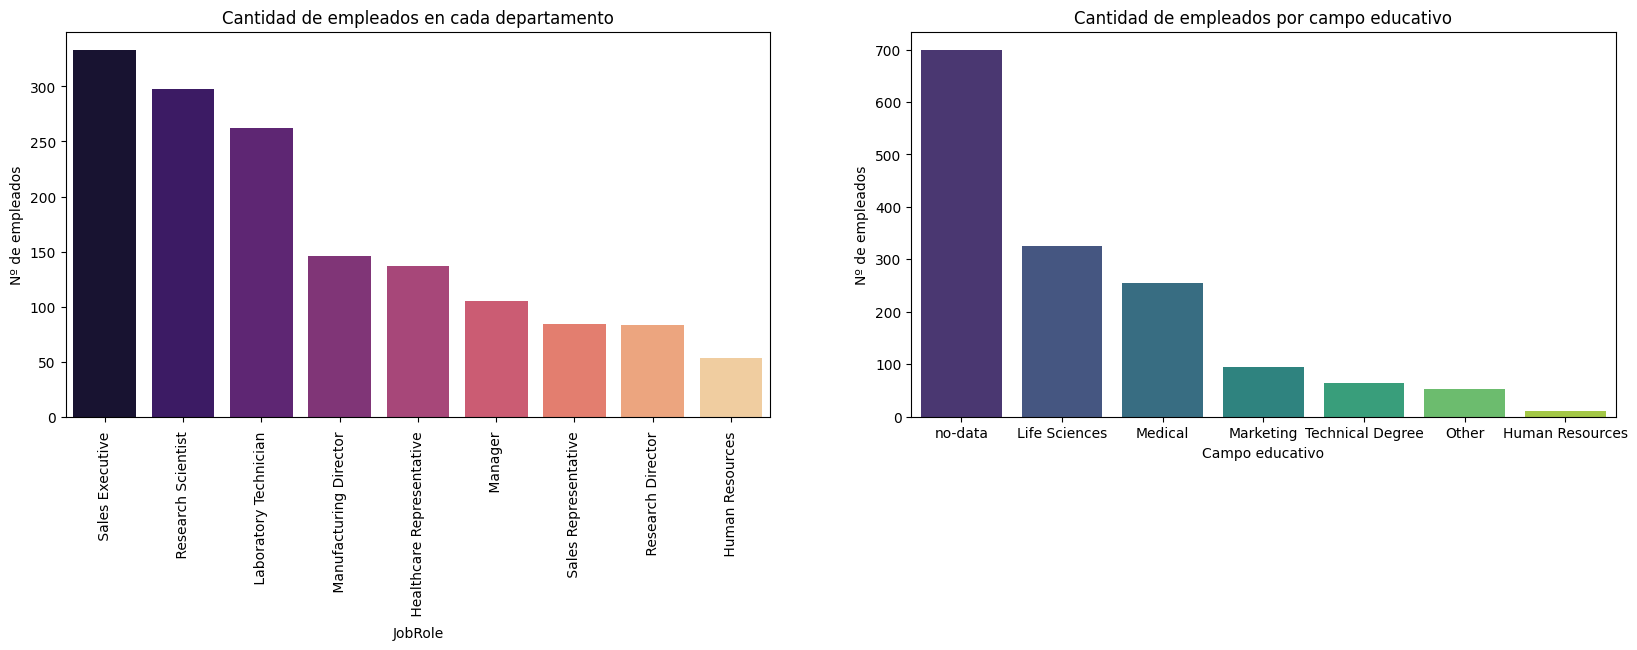

In [54]:
# Distribución de empleados por departamento y educación:

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

# Insertar los datos:
roles_count = df['JobRole'].value_counts()

sns.barplot(x = roles_count.index,
            y = roles_count.values,
            ax = axes[0], # indicamos en que eje quiero posicionarlo
            palette = "magma")

axes[0].set_xticklabels(roles_count.index, rotation=90)

education_count = df["EducationField"].value_counts()

sns.barplot(x = education_count.index, 
            y = education_count.values,
            ax = axes[1], # indico en que eje quiero posicionarlo
            palette = "viridis")


# Insertar título y título de ejes:

    ## JobRole

axes[0].set_title("Cantidad de empleados en cada departamento")

axes[0].set_xlabel("JobRole")

axes[0].set_ylabel("Nº de empleados")

    ## 2018

axes[1].set_title("Cantidad de empleados por campo educativo")

axes[1].set_xlabel("Campo educativo")

axes[1].set_ylabel("Nº de empleados");

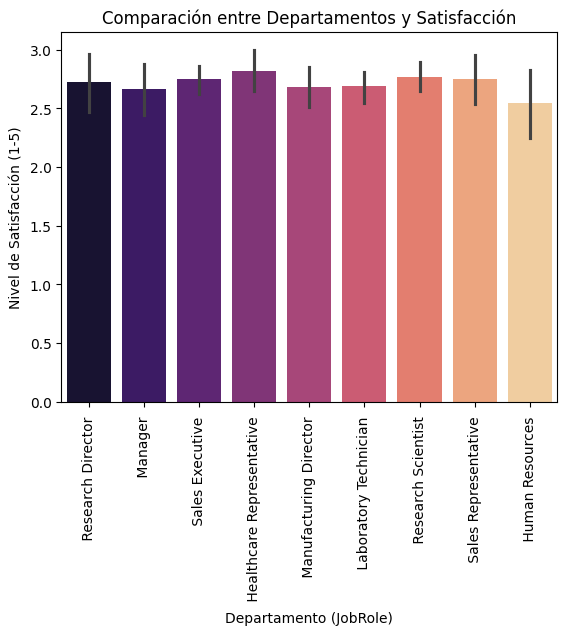

In [52]:
# Comparación entre departamento y nivel de satisfacción:

sns.barplot(x = "JobRole",
            y = "JobSatisfaction",
            data = df,
            palette = "magma")

plt.title('Comparación entre Departamentos y Satisfacción')
plt.xlabel('Departamento (JobRole)')
plt.ylabel('Nivel de Satisfacción (1-5)')

plt.xticks(rotation=90);

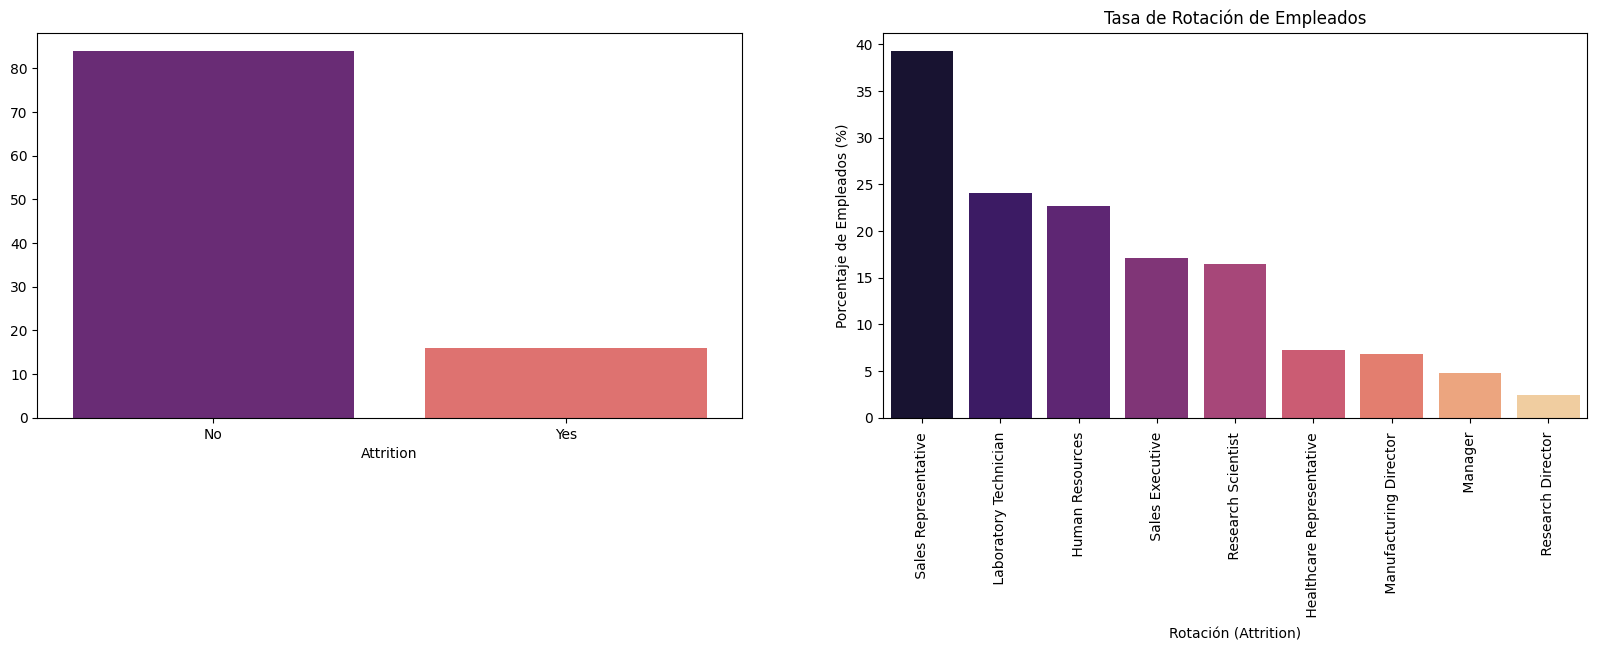

In [63]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

rotacion_count = df['Attrition'].value_counts(normalize=True) * 100

sns.barplot(x=rotacion_count.index, 
            y=rotacion_count.values,
            ax = axes[0],
            palette="magma")

rotacion_por_departamento = df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack() * 100
rotacion_por_departamento = rotacion_por_departamento.sort_values(by='Yes', ascending=False)  # Ordenar de mayor a menor rotación

sns.barplot(x=rotacion_por_departamento.index, 
            y=rotacion_por_departamento['Yes'], 
            ax = axes[1],
            palette="magma")

plt.title('Comparación de Tasa de Rotación por Departamento')
plt.xlabel('Departamento (JobRole)')
plt.ylabel('Porcentaje de Rotación (%)')
plt.xticks(rotation=90)

plt.title('Tasa de Rotación de Empleados')
plt.xlabel('Rotación (Attrition)')
plt.ylabel('Porcentaje de Empleados (%)');

CONCLUSIONES

- Podemos dar recomendaciones sobre como retener empleados como mejorar beneficios, bienestar laboral...

- Se ha visto que cuanta menos satisfacción hay entre los empleados, mayor es la tasa de rotación por lo que hay que mejorar el ambiente laboral